In [66]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv

load_dotenv()

True

In [57]:
llm = ChatOpenAI()
parser = StrOutputParser()


In [58]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explain: str

In [ ]:
def generate_joke(state: JokeState):

    prompt = ChatPromptTemplate.from_messages([
        ("system","You are a helpful agent. Generate a joke on the topic"),
        ("user","{topic}")
    ])
    chain = prompt | llm | parser
    joke = chain.invoke({"topic": state["topic"]})
    return {"joke":joke}

def generate_explanation(state: JokeState):

    prompt = ChatPromptTemplate.from_messages([
        ("system","You are a helpful agent. Explain the joke in simple way."),
        ("user","{joke}")
    ])

    chain = prompt | llm | parser
    explain = chain.invoke({"joke": state["joke"]})
    return {"explain":explain}

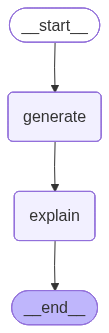

In [67]:
graph = StateGraph(JokeState)
from langgraph.checkpoint.memory import InMemorySaver

graph.add_node("generate",generate_joke)
graph.add_node("explain",generate_explanation)

graph.add_edge(START, "generate")
graph.add_edge("generate","explain")
graph.add_edge("explain",END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [68]:
from IPython.display import Markdown, display

config1 = {"configurable":{"thread_id":"1"}}
initial_state={
    "topic":"BadBunny"
}
final_state=workflow.invoke(initial_state,config=config1)
print(f"Joke is: {final_state['joke']}")
print("\n")
print(final_state['explain'])

Joke is: Why did Bad Bunny bring a ladder to the concert? 

Because he heard the music was off the charts!


The joke is a play on words. "Off the charts" is a phrase used to describe something that is extremely good or popular. In this case, the joke suggests that the music at the concert was so good that it was literally off the charts, meaning it was above and beyond normal expectations. So, Bad Bunny brought a ladder to the concert to climb up to where the amazing music was.


In [70]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'BadBunny', 'joke': 'Why did Bad Bunny bring a ladder to the concert? \n\nBecause he heard the music was off the charts!', 'explain': 'The joke is a play on words. "Off the charts" is a phrase used to describe something that is extremely good or popular. In this case, the joke suggests that the music at the concert was so good that it was literally off the charts, meaning it was above and beyond normal expectations. So, Bad Bunny brought a ladder to the concert to climb up to where the amazing music was.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f105657-2145-645e-8002-b21df13c7c62'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-09T03:14:28.896644+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f105657-148b-6524-8001-530dcc955ece'}}, tasks=(), interrupts=())

In [73]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'BadBunny', 'joke': 'Why did Bad Bunny bring a ladder to the concert? \n\nBecause he heard the music was off the charts!', 'explain': 'The joke is a play on words. "Off the charts" is a phrase used to describe something that is extremely good or popular. In this case, the joke suggests that the music at the concert was so good that it was literally off the charts, meaning it was above and beyond normal expectations. So, Bad Bunny brought a ladder to the concert to climb up to where the amazing music was.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f105657-2145-645e-8002-b21df13c7c62'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-09T03:14:28.896644+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f105657-148b-6524-8001-530dcc955ece'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'BadBunny', 'joke': 'Why did Bad 

In [74]:
config2 = {"configurable":{"thread_id":"2"}}
initial_state={
    "topic":"Bunny"
}
final_state=workflow.invoke(initial_state,config=config2)
final_state

{'topic': 'Bunny',
 'joke': 'Why did the bunny bring a ladder to the party? \n\nBecause it heard the drinks were on the house!',
 'explain': 'This joke is funny because it is a play on words. "On the house" usually means that something is provided for free by the host of a party or event. In this case, the bunny thought the drinks were literally "on the house" (on top of the building) and brought a ladder to reach them. It\'s a silly and unexpected twist on the common phrase.'}

In [75]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Bunny', 'joke': 'Why did the bunny bring a ladder to the party? \n\nBecause it heard the drinks were on the house!', 'explain': 'This joke is funny because it is a play on words. "On the house" usually means that something is provided for free by the host of a party or event. In this case, the bunny thought the drinks were literally "on the house" (on top of the building) and brought a ladder to reach them. It\'s a silly and unexpected twist on the common phrase.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10584e-d84c-665e-8002-7cdc21bc43c1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-09T06:59:50.391930+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10584e-cad9-6346-8001-1e5c689d117c'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'Bunny', 'joke': 'Why did the bunny bring a ladder to the party? \n\nBecau